In [1]:
import os
import glob
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split

import tensorflow as tf
from tensorflow import keras

from tensorflow.keras import layers
from keras.utils.vis_utils import model_to_dot

print(tf.__version__)

Using TensorFlow backend.


2.2.0


In [2]:
# labelNames = ['nsleeve', 'ssleeve', 'lsleeve', 'jsuit', 'collar', 'hood', 'coat', 'jacket', 'lpadding', 'spadding', 'cardigan', 'vest', 'spants', 'lpants', 'skirt']
# labelNames = ['0_0', '0_1', '0_2', '0_3_l', '0_3_s', '0_4_l', '0_4_s', '0_5', '0_6', '0_7',
#              '1_0', '1_1', '1_2', '1_3', '1_4', '1_5', '1_6', '1_7', '1_8', '1_9', '1_10', '1_11', '1_12', '1_13', '1_14', '1_15', '1_16', '1_17',
#              '2_0', '2_1', '2_2', '2_3',
#              '3_0', '3_1', '3_2', '3_3', '3_4', '3_5',
#              '4_0', '4_1', '4_2']
# classMatching = [([0, 11], [1], [2, 5, 6, 7, 8, 9, 10], [12, 13], [14], [3], [4])]
# classDic = { 0:1, 1:2, 2:0, 3:2, 4:1, 5:2, 6:1, 7:2, 8:2, 9:2,
#            10:2, 11:2, 12:2, 13:2, 14:2, 15:2, 16:2, 17:2, 18:2, 19:2, 20:2, 21:2, 22:2, 23:2, 24:2, 25:0, 26:0, 27:2,
#            28:5, 29:5, 30:5, 31:5,
#            32:3, 33:3, 34:3, 35:3, 36:3, 37:3,
#            38:4, 39:4, 40:4}

# classNames = ['nsleeve', 'ssleeve', 'lsleeve', 'pants', 'skirt', 'dress']

# classNames = ['nsleeve', 'vest']

# classNames = ['ssleeve', 'collar']

# classNames = ['sleeve', 'haveCollar', 'padding']
# classNames = ['lsleeve', 'hood', 'cardigan']
# classNames = ['coat', 'jacket', 'collar']
# classNames = ['lpadding', 'spadding']

# classNames = ['lpants', 'spants']

# classNames = ['dress', 'jsuit']

## 이미지 numpy array로 변경하기

In [3]:
x_train = []
y_train = []
x_test = []
y_test = []
fileNames = []

for idx, cat in enumerate(labelNames):

    label = [0 for i in range(len(classNames))]
    label[classDic[idx]] = 1

    imgDir = dir + "/" + cat
    files = glob.glob(imgDir+"/*.png")
    print(cat, " 파일 길이 : ", len(files))
    for f in range(len(files)):
        img = Image.open(files[f])
        img = img.convert("RGB")
        data = np.asarray(img)
        
        if f >= 420:
            fileNames.append(files[f])
            x_test.append(data)
            y_test.append(label)
            
        else :
            x_train.append(data)
            y_train.append(label)
            
        if f == 0:
            print(label)

# for idx in range(16) :
#     imgDir = dir + '/' + labelNames[idx]
#     files = glob.glob(imgDir+"/*.png")
#     print("파일 길이 : ", len(files))
    
#     for f in files:
#         img = Image.open(f)
#         img = img.convert("RGB")
#         data = np.asarray(img, np.int32)
        
#         label = np.zeros(16)
#         label[idx] = 1
        
#         x.append(data)
#         y.append(label)

x_train = np.array(x_train)
y_train = np.array(y_train)

x_test = np.array(x_test)
y_test = np.array(y_test)


print(x_train)
print(x_train.shape)
print(y_train.shape)

print("ok", len(x_train))

ssleeve  파일 길이 :  450
[0, 1, 0, 0, 0, 0]
lsleeve  파일 길이 :  450
[0, 1, 0, 0, 0, 0]
nsleeve  파일 길이 :  450
[1, 0, 0, 0, 0, 0]
collar  파일 길이 :  450
[0, 0, 0, 0, 0, 1]
hood  파일 길이 :  450
[0, 1, 0, 0, 0, 0]
coat  파일 길이 :  450
[0, 1, 0, 0, 0, 0]
jacket  파일 길이 :  450
[0, 1, 0, 0, 0, 0]
lpadding  파일 길이 :  450
[0, 1, 0, 0, 0, 0]
spadding  파일 길이 :  450
[0, 1, 0, 0, 0, 0]
vest  파일 길이 :  450
[1, 0, 0, 0, 0, 0]
cardigan  파일 길이 :  450
[0, 1, 0, 0, 0, 0]
jsuit  파일 길이 :  423
[0, 0, 0, 0, 1, 0]
dress  파일 길이 :  450
[0, 0, 0, 0, 1, 0]
spants  파일 길이 :  450
[0, 0, 1, 0, 0, 0]
lpants  파일 길이 :  450
[0, 0, 1, 0, 0, 0]
skirt  파일 길이 :  450
[0, 0, 0, 1, 0, 0]
[[[[255 255 255]
   [255 255 255]
   [255 255 255]
   ...
   [255 255 255]
   [255 255 255]
   [255 255 255]]

  [[255 255 255]
   [255 255 255]
   [255 255 255]
   ...
   [255 255 255]
   [255 255 255]
   [255 255 255]]

  [[255 255 255]
   [255 255 255]
   [255 255 255]
   ...
   [255 255 255]
   [255 255 255]
   [255 255 255]]

  ...

  [[255 255 255]
   

In [26]:
np.savez("imageData", x_train = x_train, y_train = y_train, x_test = x_test, y_test = y_test)

## 데이터 불러오기

In [3]:
import cv2, os, glob, numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, ZeroPadding2D, Dense, Flatten, Dropout
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
import matplotlib.pyplot as plt
from tensorflow.keras import backend as K

import tensorflow as tf
config = tf.config.experimental

imageLoad = np.load("imageData.npz")
x_train = imageLoad['x_train']
y_train = imageLoad['y_train']
x_test = imageLoad['x_test']
y_test = imageLoad['y_test']
print(x_train.shape)
print(x_test.shape)

(6720, 125, 125, 3)
(453, 125, 125, 3)


In [4]:
x_train = x_train.astype(float) / 255
x_test = x_test.astype(float) / 255

In [5]:
x_train, x_valid, y_train, y_valid = train_test_split(x_train, y_train, test_size = 0.1)

In [6]:
print(x_train.shape)
print(x_valid.shape)

(6048, 125, 125, 3)
(672, 125, 125, 3)


## 모델 설계 : CNN

In [8]:
model = Sequential()
model.add(Conv2D(32, (3,3), padding="same", input_shape=x_train.shape[1:], activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(32, (3,3), padding="same", activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
    
model.add(Conv2D(64, (3,3), padding="same", activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(64, (3,3), padding="same", activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(128, (3,3), padding="same", activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(128, (3,3), padding="same", activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
    
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(len(classNames), activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model_dir = './model'
    
if not os.path.exists(model_dir):
    os.mkdir(model_dir)
    
model_path = model_dir + '/multi_img_classification.model'
checkpoint = ModelCheckpoint(filepath=model_path , monitor='val_loss', verbose=1, save_best_only=True)
early_stopping = EarlyStopping(monitor='val_loss', patience=6)

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 125, 125, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 62, 62, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 62, 62, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 31, 31, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 31, 31, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 31, 31, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 15, 15, 64)        0

## 모델 설계 : VGGNet

In [17]:
model = Sequential()
model.add(Conv2D(64, (3,3), padding="same", input_shape=x_train.shape[1:], activation='relu'))
model.add(Conv2D(64, (3,3), padding="same", activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Conv2D(64, (3,3), padding="same", activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(ZeroPadding2D((1,1)))
model.add(Conv2D(128, (3,3), padding="same", activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Conv2D(128, (3,3), padding="same", activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(ZeroPadding2D((1,1)))
model.add(Conv2D(256, (3,3), padding="same", activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Conv2D(256, (3,3), padding="same", activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Conv2D(256, (3,3), padding="same", activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(len(classNames), activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model_dir = './model'
    
if not os.path.exists(model_dir):
    os.mkdir(model_dir)
    
model_path = model_dir + '/multi_img_classification.model'
checkpoint = ModelCheckpoint(filepath=model_path , monitor='val_loss', verbose=1, save_best_only=True)
early_stopping = EarlyStopping(monitor='val_loss', patience=6)

## 모델 성능 확인

In [10]:
history = model.fit(data.flow(x_train, y_train, batch_size=32), epochs=100, validation_data=(x_valid, y_valid), callbacks=[checkpoint, early_stopping])

Epoch 1/100
189/189 [==============================] - ETA: 0s - loss: 1.5017 - accuracy: 0.4977
Epoch 00001: val_loss improved from inf to 1.44213, saving model to ./model/multi_img_classification.model
Instructions for updating:
If using Keras pass *_constraint arguments to layers.
INFO:tensorflow:Assets written to: ./model/multi_img_classification.model\assets
189/189 [==============================] - 220s 1s/step - loss: 1.5017 - accuracy: 0.4977 - val_loss: 1.4421 - val_accuracy: 0.4911
Epoch 2/100
189/189 [==============================] - ETA: 0s - loss: 1.4410 - accuracy: 0.5010
Epoch 00002: val_loss improved from 1.44213 to 1.36729, saving model to ./model/multi_img_classification.model
INFO:tensorflow:Assets written to: ./model/multi_img_classification.model\assets
189/189 [==============================] - 219s 1s/step - loss: 1.4410 - accuracy: 0.5010 - val_loss: 1.3673 - val_accuracy: 0.4955
Epoch 3/100
189/189 [==============================] - ETA: 0s - loss: 1.3851 - a

Epoch 22/100
189/189 [==============================] - ETA: 0s - loss: 0.8761 - accuracy: 0.6987
Epoch 00022: val_loss did not improve from 0.73120
189/189 [==============================] - 201s 1s/step - loss: 0.8761 - accuracy: 0.6987 - val_loss: 0.7419 - val_accuracy: 0.7411
Epoch 23/100
189/189 [==============================] - ETA: 0s - loss: 0.8653 - accuracy: 0.7049
Epoch 00023: val_loss did not improve from 0.73120
189/189 [==============================] - 200s 1s/step - loss: 0.8653 - accuracy: 0.7049 - val_loss: 0.7769 - val_accuracy: 0.7158
Epoch 24/100
189/189 [==============================] - ETA: 0s - loss: 0.8528 - accuracy: 0.7059
Epoch 00024: val_loss improved from 0.73120 to 0.68629, saving model to ./model/multi_img_classification.model
INFO:tensorflow:Assets written to: ./model/multi_img_classification.model\assets
189/189 [==============================] - 216s 1s/step - loss: 0.8528 - accuracy: 0.7059 - val_loss: 0.6863 - val_accuracy: 0.7545
Epoch 25/100
189

In [11]:
print("정확도 : %.4f" % (model.evaluate(x_test, y_test)[1]))

15/15 [==============================] - 2s 104ms/step - loss: 0.7690 - accuracy: 0.7152
정확도 : 0.7152


In [14]:
from keras.models import load_model
model.save('model.h5')

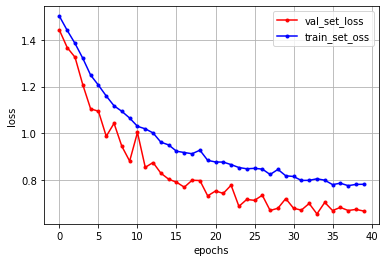

In [15]:
y_vloss = history.history['val_loss']
y_loss = history.history['loss']

x_len = np.arange(len(y_loss))

plt.plot(x_len, y_vloss, marker='.', c='red', label='val_set_loss')
plt.plot(x_len, y_loss, marker='.', c='blue', label='train_set_oss')
plt.legend()
plt.xlabel('epochs')
plt.ylabel('loss')
plt.grid()
plt.show()

## test data 확인

In [1]:
from PIL import Image
import os, glob, numpy as np
from tensorflow.keras.models import load_model
model = load_model('model.h5')

prediction = model.predict(x_test)
np.set_printoptions(formatter={'float': lambda x: "{0:0.3f}".format(x)})
cnt = 0

for i in prediction:
    pre_ans = i.argmax()  # 예측 레이블
    print(i)
    print("해당 "+fileNames[cnt].split("\\")[0]+"이미지는 "+classNames[pre_ans]+"로 추정됩니다.")
    cnt += 1
    print("="*40)

NameError: name 'x_test' is not defined